In [1]:
import pyarrow.parquet as pq
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2021-11-26 13:07:14.355887: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-26 13:07:14.355921: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
skim = pq.read_table("Skim.parquet")

In [3]:
df = skim.to_pandas()

In [4]:
print(df)

         weight   Eta_ph1   Phi_ph1  E_mGG_ph1  pT_mGG_ph1   Eta_ph2  \
0      0.000025  1.151401  2.699523   1.979170    1.137842  1.603054   
1      0.000025 -2.393572 -2.922358   2.951623    0.534528 -2.449574   
2      0.000025 -0.010950 -2.823565   0.760817    0.760772 -1.469144   
3      0.000025  1.871283  1.047394   2.573060    0.773788  0.890115   
4      0.000025 -0.915309 -0.537407   1.380653    0.952852 -1.062086   
...         ...       ...       ...        ...         ...       ...   
17152  2.124138  0.584682 -2.738620   0.534506    0.454570 -0.581062   
17153  2.124138  1.768515 -1.657488   1.534096    0.508591  1.258975   
17154  2.124138  1.559572  2.944369   1.155720    0.465358 -0.729275   
17155  2.124138  0.322797 -2.931800   0.664161    0.631000 -0.139907   
17156  2.124138  0.656518 -2.012486   0.951118    0.777463  0.842254   

        Phi_ph2  E_mGG_ph2  pT_mGG_ph2  Electron_E  ...     pT_jet1  Eta_jet1  \
0      1.725826   2.097534    0.811509  233.906647  ..

In [5]:
df["label"] = 0

In [6]:
print(df)

         weight   Eta_ph1   Phi_ph1  E_mGG_ph1  pT_mGG_ph1   Eta_ph2  \
0      0.000025  1.151401  2.699523   1.979170    1.137842  1.603054   
1      0.000025 -2.393572 -2.922358   2.951623    0.534528 -2.449574   
2      0.000025 -0.010950 -2.823565   0.760817    0.760772 -1.469144   
3      0.000025  1.871283  1.047394   2.573060    0.773788  0.890115   
4      0.000025 -0.915309 -0.537407   1.380653    0.952852 -1.062086   
...         ...       ...       ...        ...         ...       ...   
17152  2.124138  0.584682 -2.738620   0.534506    0.454570 -0.581062   
17153  2.124138  1.768515 -1.657488   1.534096    0.508591  1.258975   
17154  2.124138  1.559572  2.944369   1.155720    0.465358 -0.729275   
17155  2.124138  0.322797 -2.931800   0.664161    0.631000 -0.139907   
17156  2.124138  0.656518 -2.012486   0.951118    0.777463  0.842254   

        Phi_ph2  E_mGG_ph2  pT_mGG_ph2  Electron_E  ...  Eta_jet1  Phi_jet1  \
0      1.725826   2.097534    0.811509  233.906647  ... 

In [7]:
df.loc[df.process.str.contains("HHH"), ['label']] = 1

In [8]:
print(df)

         weight   Eta_ph1   Phi_ph1  E_mGG_ph1  pT_mGG_ph1   Eta_ph2  \
0      0.000025  1.151401  2.699523   1.979170    1.137842  1.603054   
1      0.000025 -2.393572 -2.922358   2.951623    0.534528 -2.449574   
2      0.000025 -0.010950 -2.823565   0.760817    0.760772 -1.469144   
3      0.000025  1.871283  1.047394   2.573060    0.773788  0.890115   
4      0.000025 -0.915309 -0.537407   1.380653    0.952852 -1.062086   
...         ...       ...       ...        ...         ...       ...   
17152  2.124138  0.584682 -2.738620   0.534506    0.454570 -0.581062   
17153  2.124138  1.768515 -1.657488   1.534096    0.508591  1.258975   
17154  2.124138  1.559572  2.944369   1.155720    0.465358 -0.729275   
17155  2.124138  0.322797 -2.931800   0.664161    0.631000 -0.139907   
17156  2.124138  0.656518 -2.012486   0.951118    0.777463  0.842254   

        Phi_ph2  E_mGG_ph2  pT_mGG_ph2  Electron_E  ...  Eta_jet1  Phi_jet1  \
0      1.725826   2.097534    0.811509  233.906647  ... 

In [9]:
input_vars=["Eta_ph1","Phi_ph1","E_mGG_ph1","pT_mGG_ph1","Eta_ph2","Phi_ph2","E_mGG_ph2","pT_mGG_ph2","Electron_E","Electron_pT","Electron_Eta","Electron_Phi","Muon_E","Muon_pT","Muon_Eta","Muon_Phi","nJets","E_jet1","pT_jet1","Eta_jet1","Phi_jet1","E_jet2","pT_jet2","Eta_jet2","Phi_jet2","InvM_jet","InvM_jet2" ]

In [10]:
print(df[input_vars])

        Eta_ph1   Phi_ph1  E_mGG_ph1  pT_mGG_ph1   Eta_ph2   Phi_ph2  \
0      1.151401  2.699523   1.979170    1.137842  1.603054  1.725826   
1     -2.393572 -2.922358   2.951623    0.534528 -2.449574  0.575581   
2     -0.010950 -2.823565   0.760817    0.760772 -1.469144 -2.621348   
3      1.871283  1.047394   2.573060    0.773788  0.890115 -2.034852   
4     -0.915309 -0.537407   1.380653    0.952852 -1.062086  0.838546   
...         ...       ...        ...         ...       ...       ...   
17152  0.584682 -2.738620   0.534506    0.454570 -0.581062  0.319982   
17153  1.768515 -1.657488   1.534096    0.508591  1.258975  1.448236   
17154  1.559572  2.944369   1.155720    0.465358 -0.729275  0.099446   
17155  0.322797 -2.931800   0.664161    0.631000 -0.139907  0.147806   
17156  0.656518 -2.012486   0.951118    0.777463  0.842254  1.089979   

       E_mGG_ph2  pT_mGG_ph2  Electron_E  Electron_pT  ...      E_jet1  \
0       2.097534    0.811509  233.906647   116.614990  ...  1

In [11]:
df_clean = df[input_vars].copy()
df_clean["label"] = df.loc[:,"label"]
df_clean.to_csv("dataframe_HHWWgg.csv")


In [12]:
X_train, X_test, y_train, y_test = train_test_split(df[input_vars], df.label, 
                                                    test_size=0.33, random_state=42)

In [13]:
print(X_train)

         Eta_ph1   Phi_ph1  E_mGG_ph1  pT_mGG_ph1   Eta_ph2   Phi_ph2  \
137040  1.946211 -1.814785   2.948212    0.825261  2.369483  3.089034   
4171   -0.877800 -0.832266   0.351937    0.249485  1.779025  2.213628   
72315  -0.029143  2.507272   1.057403    1.056954 -0.546729  1.598538   
125171  1.556867 -3.129845   2.164499    0.873710  1.471290  1.880348   
275723  0.044455  1.187478   0.664493    0.663837  0.919653  2.937167   
...          ...       ...        ...         ...       ...       ...   
119879  0.297534  0.085858   1.014306    0.971008  0.893292  1.293659   
259178  0.478522  0.278923   1.149519    1.029396 -0.415534 -1.705359   
131932  1.429820 -1.667721   1.607828    0.727969  0.297623 -0.886778   
146867 -1.633786 -2.092704   3.797675    1.428120 -0.979864  2.369559   
121958 -0.374497  0.107727   1.393763    1.301430 -0.576653 -2.193389   

        E_mGG_ph2  pT_mGG_ph2  Electron_E  Electron_pT  ...      E_jet1  \
137040   3.627645    0.672696  159.290375    88.

In [14]:
print(X_test)

         Eta_ph1   Phi_ph1  E_mGG_ph1  pT_mGG_ph1   Eta_ph2   Phi_ph2  \
121126 -2.449554 -2.377528   7.983311    1.368234 -1.956931  1.844228   
160409 -1.991517  0.795050   2.420583    0.648678 -0.800447 -1.363157   
2261    0.094686  1.624229   0.501410    0.499171  2.205986  0.466304   
69198  -1.144868  1.125008   1.195261    0.690844 -1.819964 -2.864105   
227139 -0.644205 -0.917350   0.760011    0.625639  0.866247 -1.265670   
...          ...       ...        ...         ...       ...       ...   
97758  -0.103974 -0.224895   1.465126    1.457242 -0.539908 -2.158751   
236182 -1.132990 -1.487194   1.188946    0.693871 -1.123002  1.106491   
4820    1.558753  1.043660   2.109347    0.849979  1.846972  2.366458   
55384  -0.149915 -1.026957   0.629855    0.622843  0.936602  1.425152   
36330  -0.980607 -1.473044   1.032735    0.679172 -1.935802  2.865290   

        E_mGG_ph2  pT_mGG_ph2  Electron_E  Electron_pT  ...      E_jet1  \
121126   0.826978    0.229116    0.000000     0.

In [15]:
inputs = keras.Input(shape=(len(input_vars),), name="particles")
x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = layers.Dense(64, activation="relu", name="dense_2")(x)
outputs = layers.Dense(1, activation="sigmoid", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

2021-11-26 13:09:45.830045: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-26 13:09:45.830081: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-26 13:09:45.830110: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (1S0): /proc/driver/nvidia/version does not exist
2021-11-26 13:09:45.830450: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
model.compile(
    optimizer=keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.BinaryCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.BinaryAccuracy()],
)

In [17]:
X_val = X_train[-3000:]
y_val = y_train[-3000:]
X_train = X_train[:-3000]
y_train = y_train[:-3000]

In [18]:
print(X_train)

         Eta_ph1   Phi_ph1  E_mGG_ph1  pT_mGG_ph1   Eta_ph2   Phi_ph2  \
137040  1.946211 -1.814785   2.948212    0.825261  2.369483  3.089034   
4171   -0.877800 -0.832266   0.351937    0.249485  1.779025  2.213628   
72315  -0.029143  2.507272   1.057403    1.056954 -0.546729  1.598538   
125171  1.556867 -3.129845   2.164499    0.873710  1.471290  1.880348   
275723  0.044455  1.187478   0.664493    0.663837  0.919653  2.937167   
...          ...       ...        ...         ...       ...       ...   
243236 -0.674916  0.569737   2.922033    2.363084 -0.944601 -0.258008   
136535  0.905024  0.692563   0.609027    0.423447 -1.298370  0.287107   
182024 -0.953191 -3.129864   0.829327    0.556692 -1.968687 -1.419089   
5316   -0.389882 -2.366568   0.506648    0.470438  0.915131  0.632446   
136554 -0.696973  1.661161   0.889458    0.709932 -1.356449 -0.868669   

        E_mGG_ph2  pT_mGG_ph2  Electron_E  Electron_pT  ...      E_jet1  \
137040   3.627645    0.672696  159.290375    88.

In [19]:
history = model.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=10,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(X_val, y_val),
)

2021-11-26 13:09:59.831496: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 48458088 exceeds 10% of free system memory.


Epoch 1/10
1753/1753 [==============================] - 3s 1ms/step - loss: 0.6261 - binary_accuracy: 0.8188 - val_loss: 0.3936 - val_binary_accuracy: 0.8293
Epoch 2/10
1753/1753 [==============================] - 2s 1ms/step - loss: 0.3563 - binary_accuracy: 0.8571 - val_loss: 0.2874 - val_binary_accuracy: 0.8753
Epoch 3/10
1753/1753 [==============================] - 2s 1ms/step - loss: 0.3044 - binary_accuracy: 0.8742 - val_loss: 0.2647 - val_binary_accuracy: 0.8867
Epoch 4/10
1753/1753 [==============================] - 2s 1ms/step - loss: 0.2808 - binary_accuracy: 0.8833 - val_loss: 0.2663 - val_binary_accuracy: 0.8850
Epoch 5/10
1753/1753 [==============================] - 2s 1ms/step - loss: 0.2670 - binary_accuracy: 0.8876 - val_loss: 0.2431 - val_binary_accuracy: 0.9003
Epoch 6/10
1753/1753 [==============================] - 2s 1ms/step - loss: 0.2575 - binary_accuracy: 0.8915 - val_loss: 0.2321 - val_binary_accuracy: 0.9023
Epoch 7/10
1753/1753 [==============================

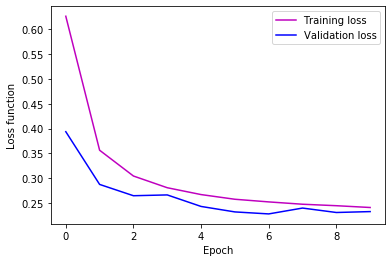

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='m',label='Training loss')
plt.plot(history.history['val_loss'],color='b',label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss function')
plt.legend(loc='upper right')
#plt.savefig('plots/2016_training_validation.pdf')
plt.show()

[[0.95558727]
 [0.48557672]
 [0.5372894 ]
 ...
 [0.9983971 ]
 [0.29774454]
 [0.45849827]]


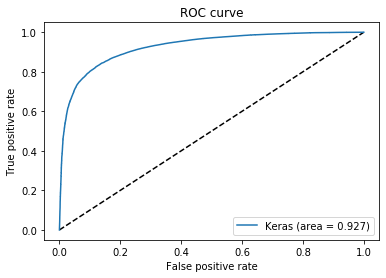

In [21]:
prediction = model.predict(X_test)
from sklearn.metrics import roc_curve
#y_pred_keras = keras_model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, prediction)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

print(prediction)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='XGBoost (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

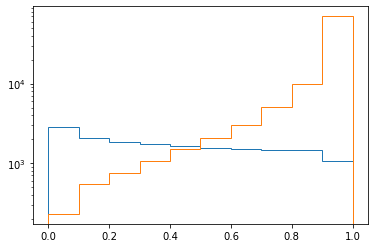

In [22]:
plt.hist(prediction[y_test==0],histtype=("step"));
plt.hist(prediction[y_test==1],histtype=("step"));
plt.yscale('log') 

In [23]:
# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

2021-11-26 13:11:02.459511: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 24186600 exceeds 10% of free system memory.


3500/3500 - 2s - loss: 0.2359 - binary_accuracy: 0.9000 - 2s/epoch - 503us/step
binary_accuracy: 90.00%


In [24]:
# save model and architecture to single file
model.save("model_dnn")
print("Saved model to disk")

2021-11-26 13:11:06.043899: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: model_dnn/assets
Saved model to disk
